<a href="https://colab.research.google.com/github/muyale/Cognizant-Junior-Data-Science-projects/blob/main/Sales_Analysis_Report__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SALES ANALYSIS PROJECT** :

In This Project given client data ,my task as a Junior Data Scientist is to analyze the data ,derive insight and using the information obtain advise the client .

In [1]:
# loading the required dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading in the data
df = pd.read_csv("/content/sample_sales_data.csv")
df.head(10)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
5,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash
6,6,4997b1ae-f5aa-4b9f-8fc8-22ad8f19837c,2022-03-07 19:36:57,14736243-d346-438f-9535-d80fcb9f3882,fruit,standard,1.49,4,5.96,e-wallet
7,7,bfffee68-0736-42af-bd3e-4ca77541b0d6,2022-03-07 19:03:20,0ddc2379-adba-4fb0-aa97-19fcafc738a1,fruit,basic,3.99,4,15.96,credit card
8,8,ce50e984-90cd-4b47-8537-3a4e32e6d314,2022-03-07 11:34:32,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,non-member,3.99,1,3.99,credit card
9,9,f0700cc9-e6f5-4b9a-add4-05e64b4f495b,2022-03-07 09:20:12,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,3,1.47,e-wallet


In [3]:
# lets see how many columns the data has ,or the shape of our data
df.shape # there are a total of 10 columns

(7829, 10)

In [4]:
df.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [5]:
# I will drop the unnamed columns as it does not have importance
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [7]:
# Checking the number of unique transactions  and if they are the same as the entries in the rows
df['transaction_id'].nunique()

7829

In [8]:
# running a basic statistical analysis
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [9]:
# checking if there arnull values
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

# **DATA ANALYSIS** :

In this section I will look at data more objectively and will do so in the following mannner .


1.   Univariate Plots for numerical and categorical data
2.   Bivariate plots to check for relationships between variables
3. Correlation plots and pairplot




<function matplotlib.pyplot.show(close=None, block=None)>

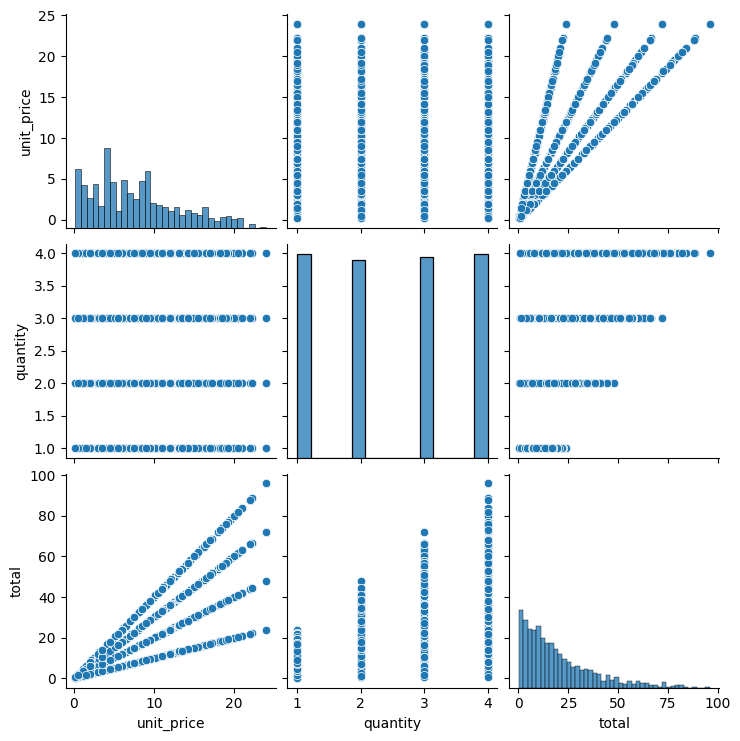

In [10]:
# drawing  a countplots for all the variables in our dataset
sns.pairplot(df)
plt.show

In [11]:
# Creating some helper functions to help us in visualizing the data
def draw_histogram(column,kde=None,df=df):
  plt.figure(figsize=(20,8))
  sns.histplot(x=column,kde=kde,data=df)
  plt.xlabel(f" {column}")
  plt.ylabel("Frequency")
  plt.title(f"Histogram showing the distribution of  {column}")
  plt.show()

def draw_bivariate (column1,column2,hue=None,df=df):
  plt.figure(figsize=(20,8))
  sns.catplot(x=column1,y=column2,hue=hue,data=df)
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.show()
def draw_countplot(column,hue=None,df=df):
  plt.figure(figsize=(20,8))
  sns.countplot(x=column,data=df,hue=hue)
  plt.xlabel(f"A Countplot showingdistribution of {column}")
  plt.ylabel("Total Number")
  plt.show()

In [12]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [13]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [14]:
# I will divide my data into categorical features and numerical
df.drop(['transaction_id','product_id'],axis=1,inplace=True) # I dropped them because I will not use them in my analysis

In [15]:
df.dtypes

timestamp        datetime64[ns]
category                 object
customer_type            object
unit_price              float64
quantity                  int64
total                   float64
payment_type             object
dtype: object

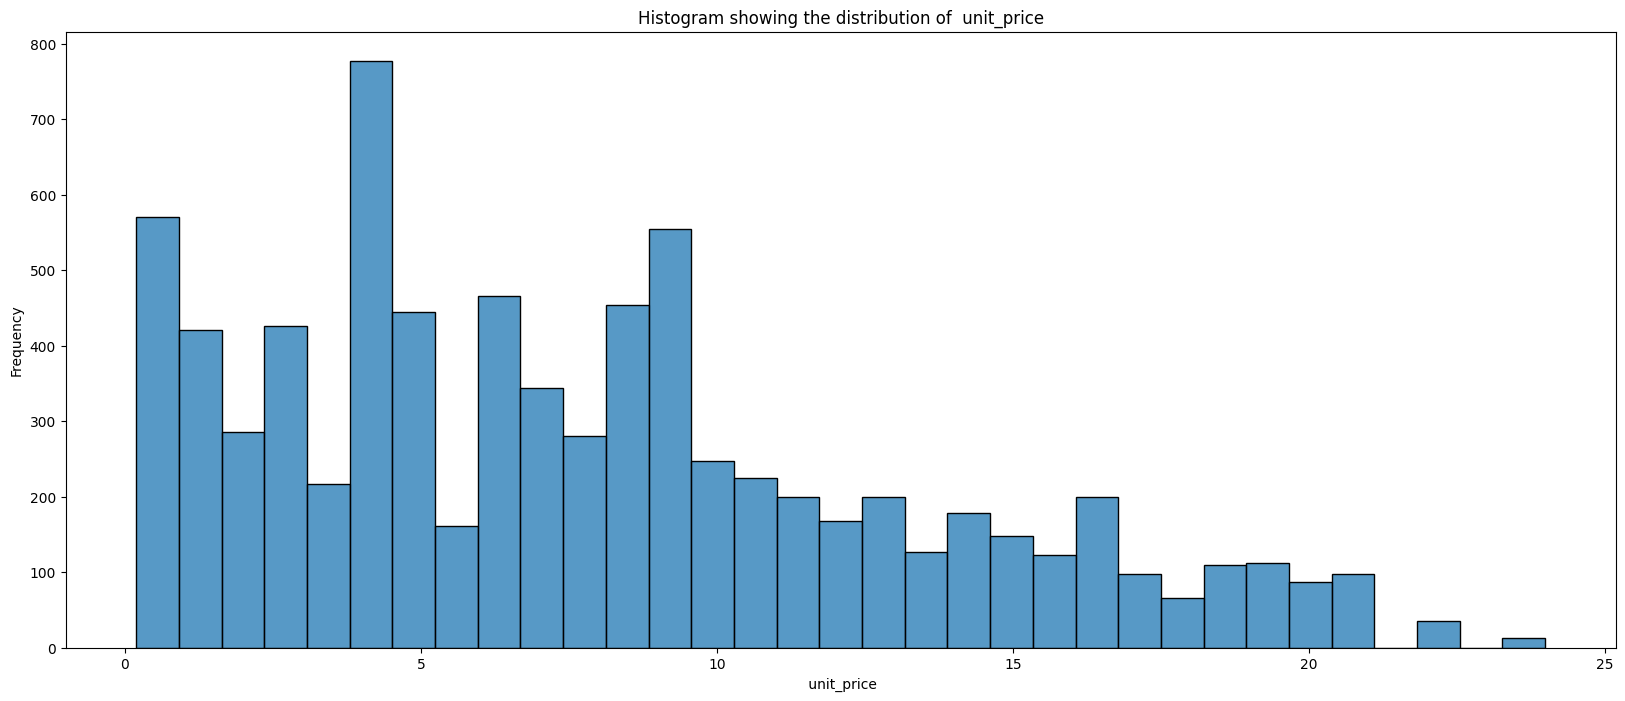

In [16]:
# Checking the distribution of unit price
draw_histogram("unit_price")  # A lot of customers spend around 4.8 price units

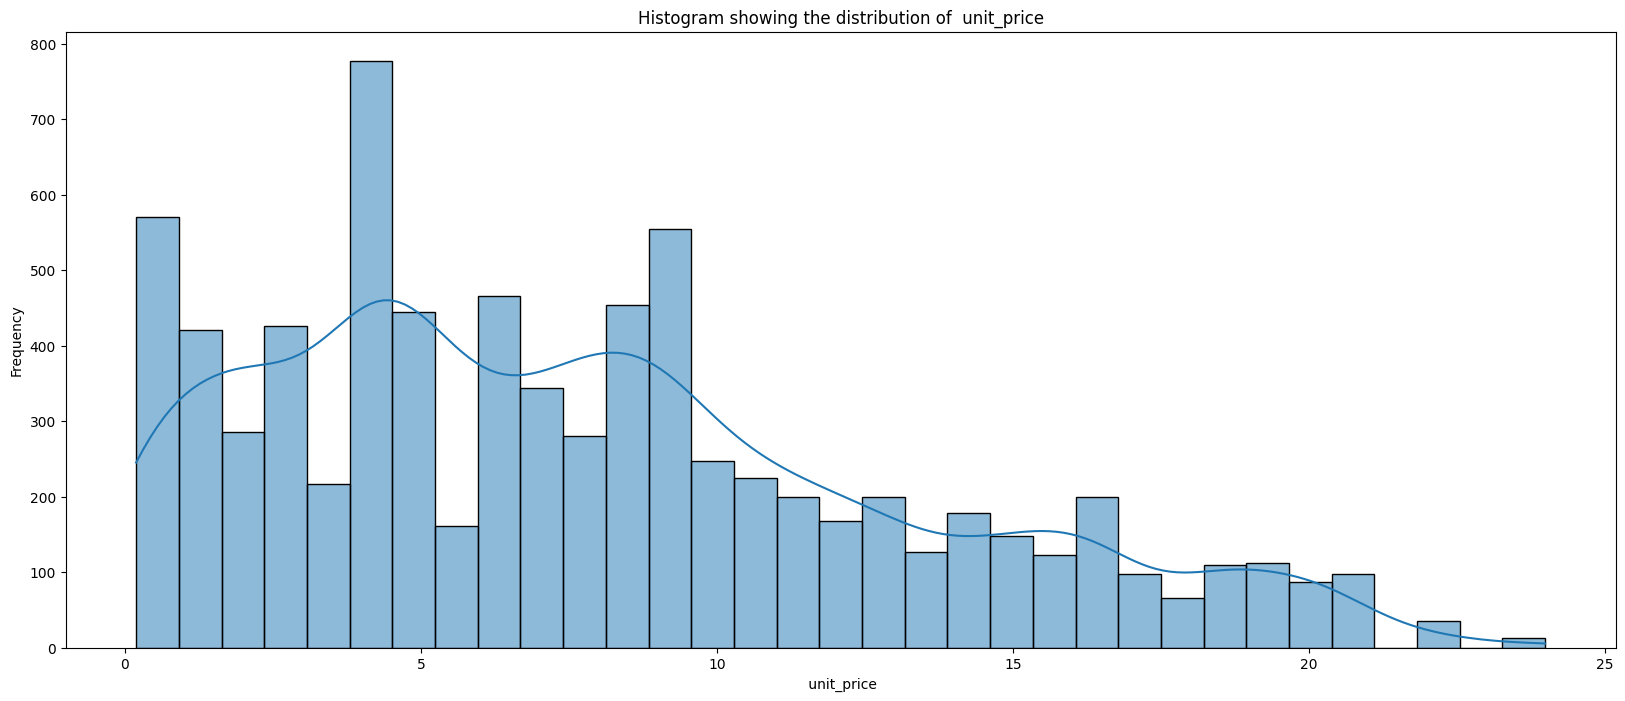

In [17]:
draw_histogram("unit_price",kde=True) # The more the unit price the less the customers purchase

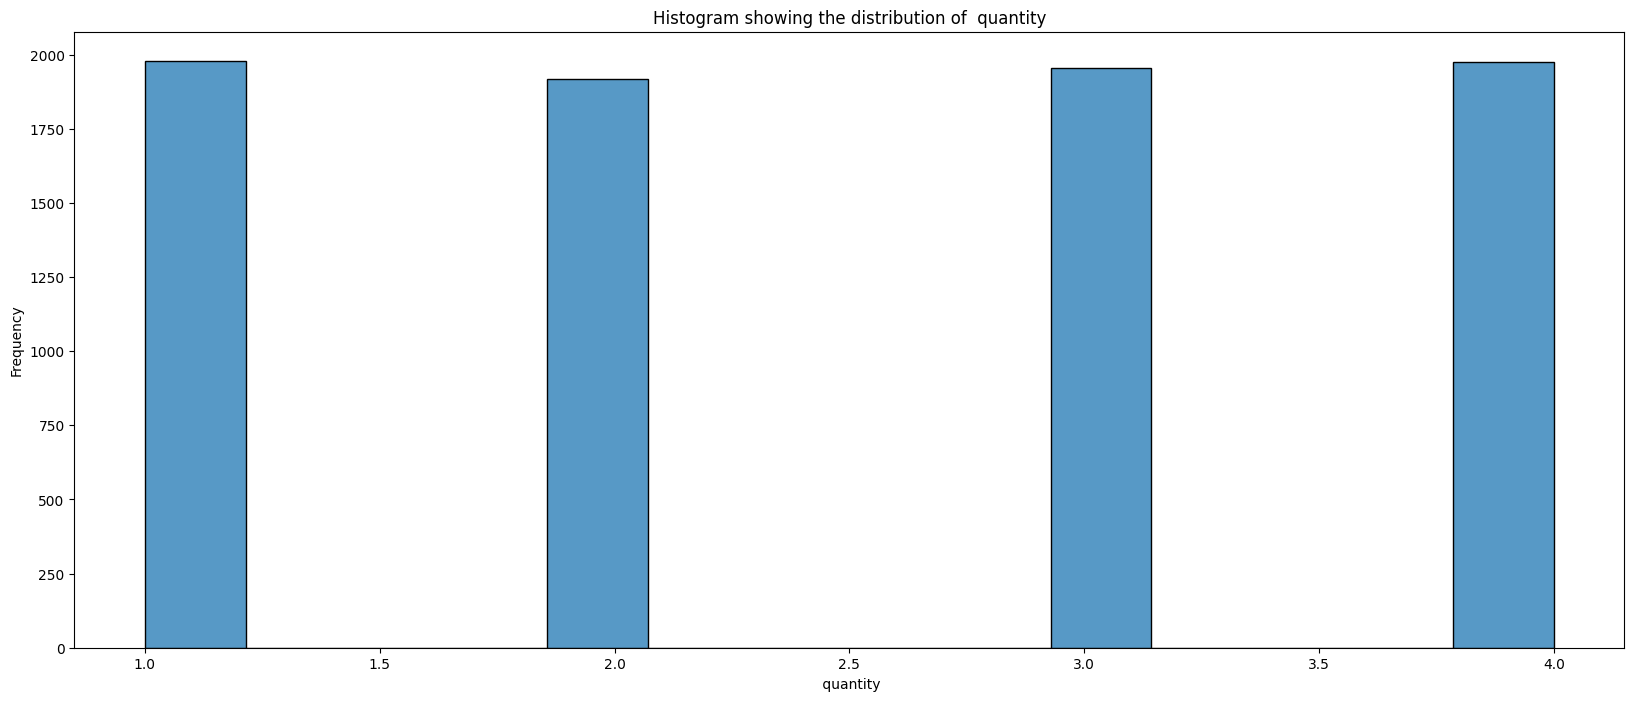

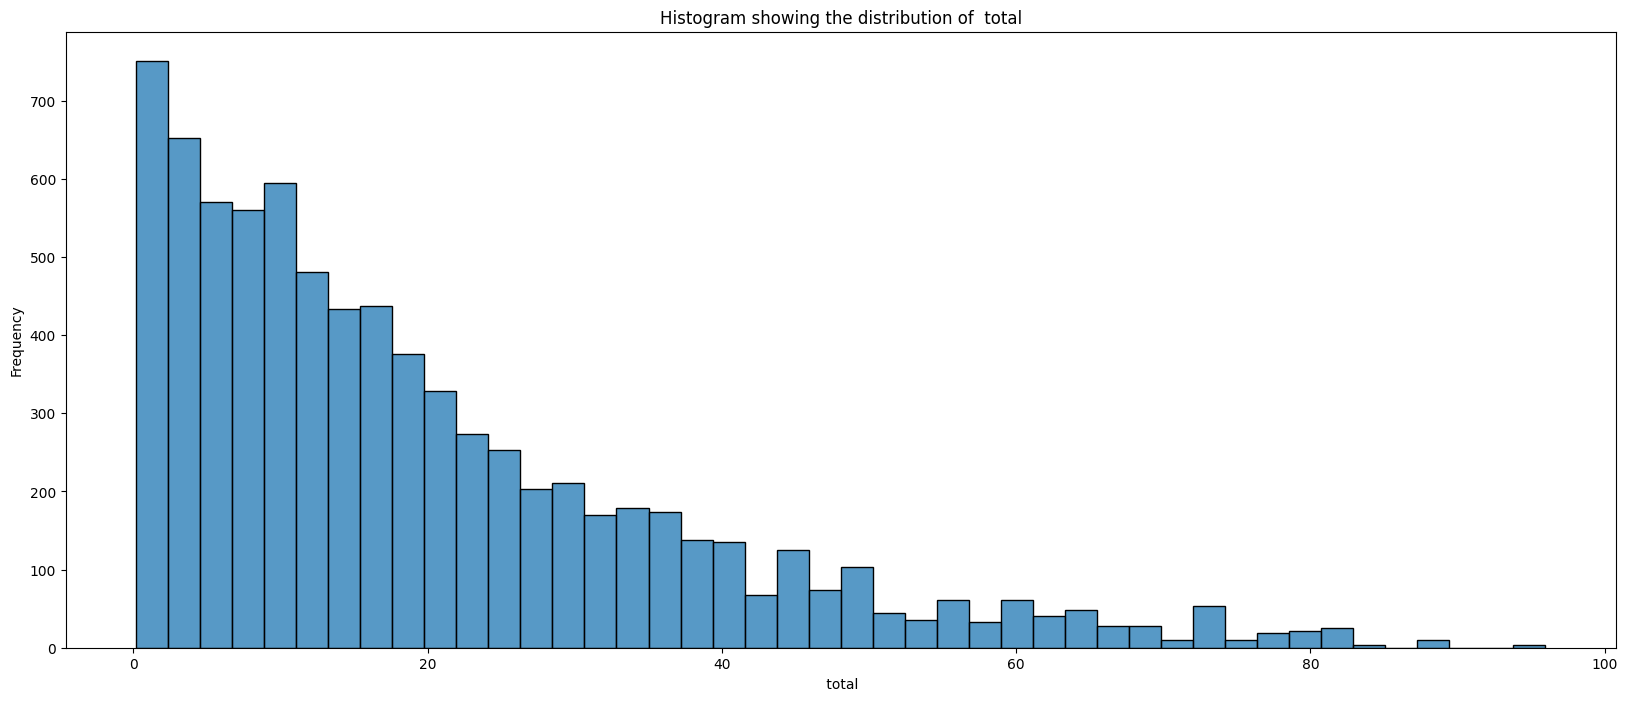

In [18]:
for column in df.columns :
    if column in ['quantity','total']:
        draw_histogram(column)
    else :
        pass
#  Quantity has an almost uniform distribution
# As for the total purchases ,there seems to be a common range that people prefer

<Figure size 2000x800 with 0 Axes>

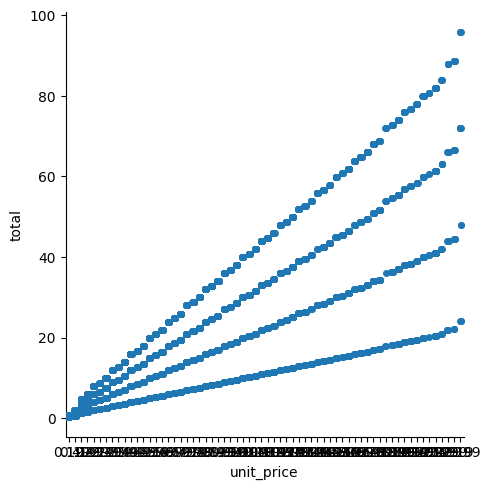

In [19]:
# Lets explore the unit price and total purchase ,what does the market prefer ?
draw_bivariate("unit_price","total")

In [20]:
df['unit_price'] = np.round(df['unit_price']).astype('int')
df['unit_price']

0        4
1        4
2        0
3        0
4        4
        ..
7824    14
7825    17
7826    14
7827    17
7828    15
Name: unit_price, Length: 7829, dtype: int64

<Figure size 2000x800 with 0 Axes>

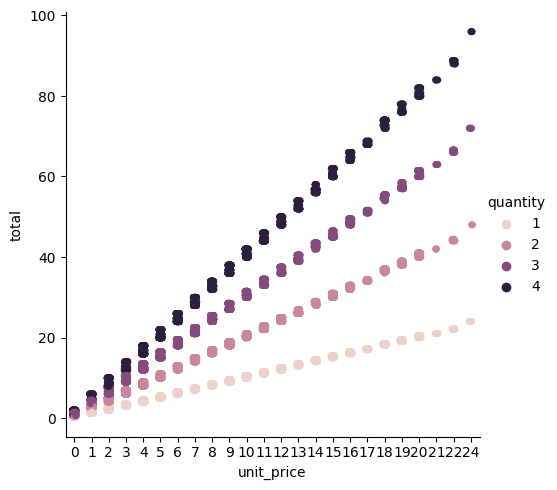

In [21]:
draw_bivariate('unit_price','total',hue='quantity')

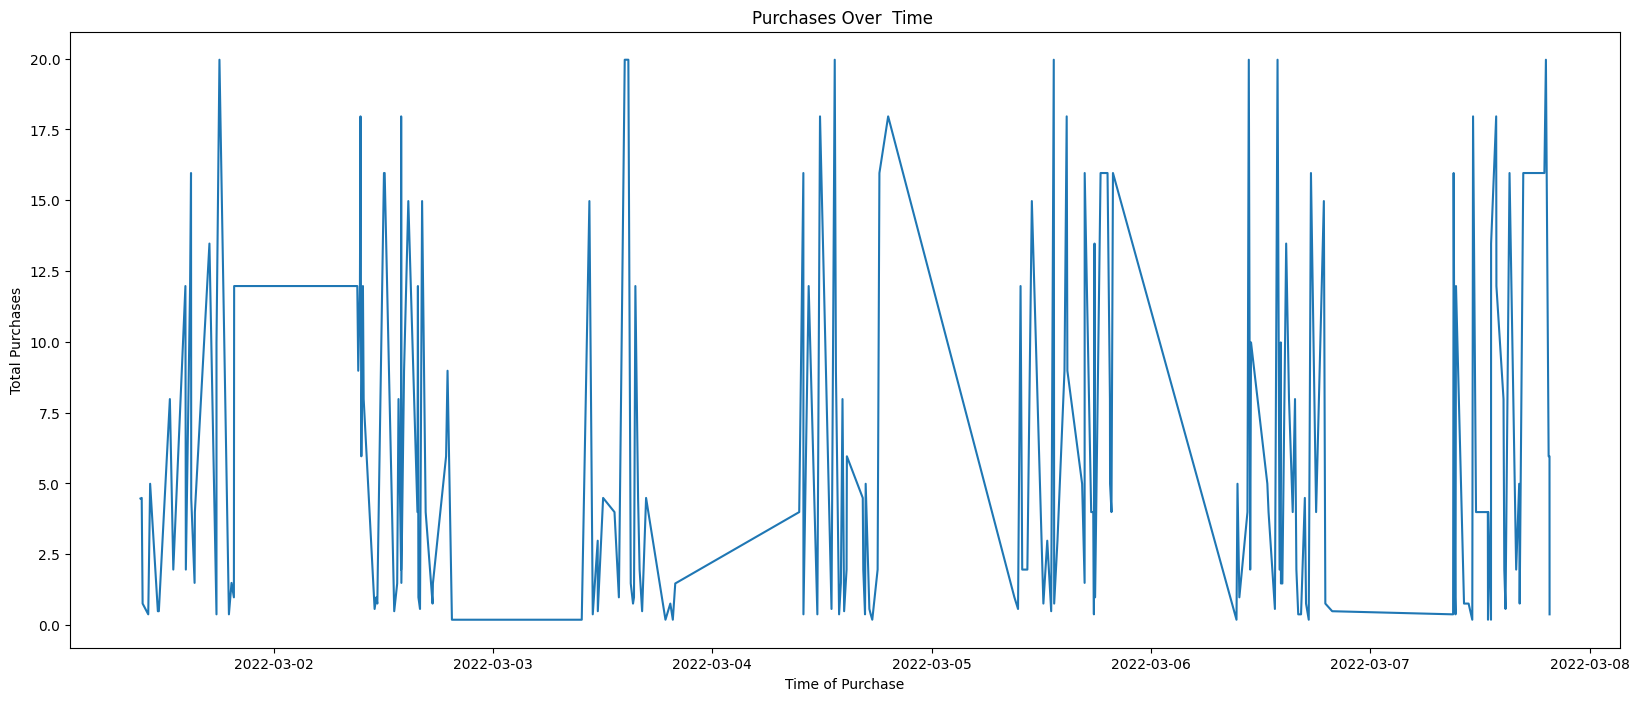

In [22]:
fig = plt.figure(figsize=(20,8))
sns.lineplot(x='timestamp',y='total',data=df.head(200))
plt.xlabel("Time of Purchase")
plt.ylabel("Total Purchases")
plt.title("Purchases Over  Time ")
plt.show() # The purchases are unpredictable ,with some highs and very low lows

# ANALYSIS OF CATEGORICAL COLUMNS
**Countplots Storytelling**

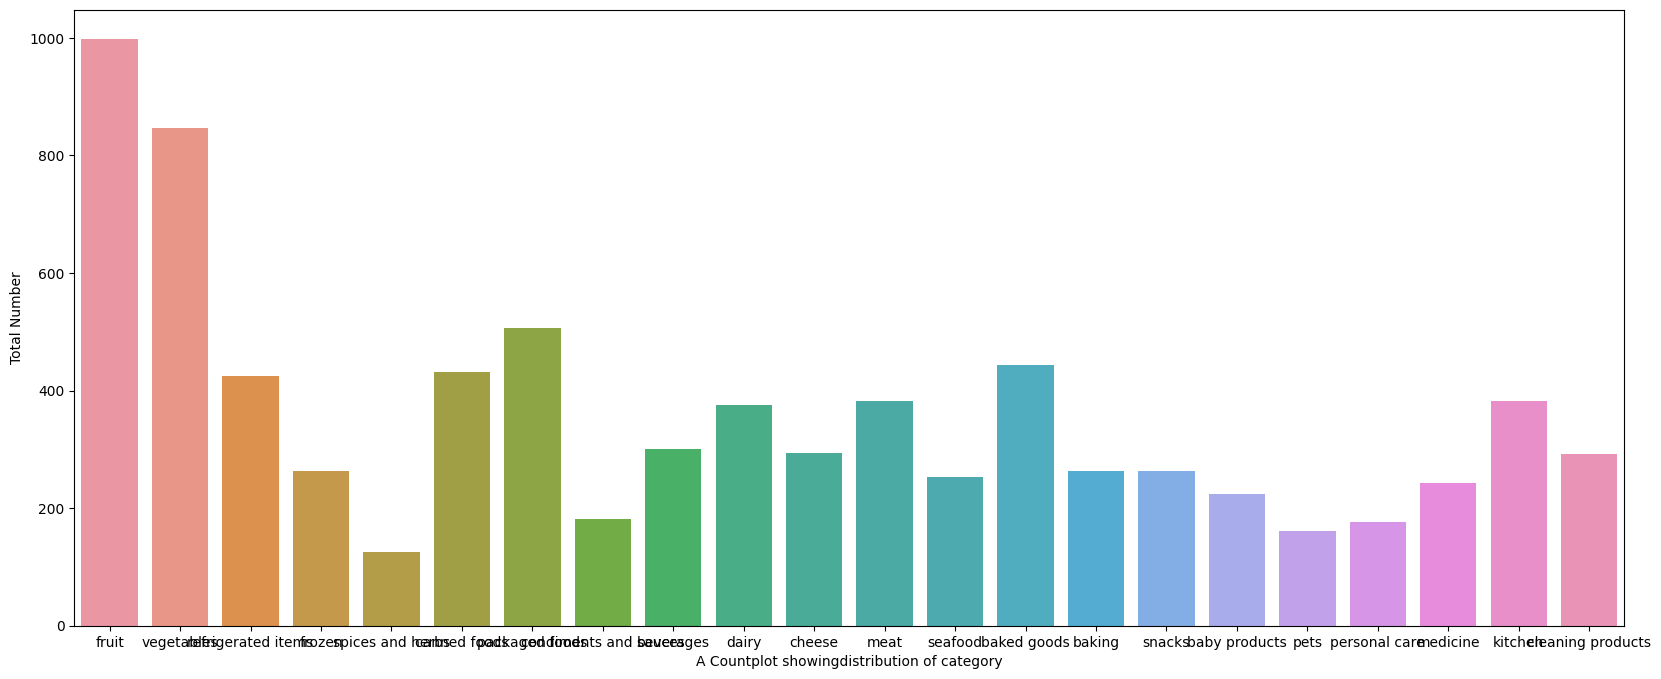

In [23]:
draw_countplot('category') # A lot of the purchases are on fruits

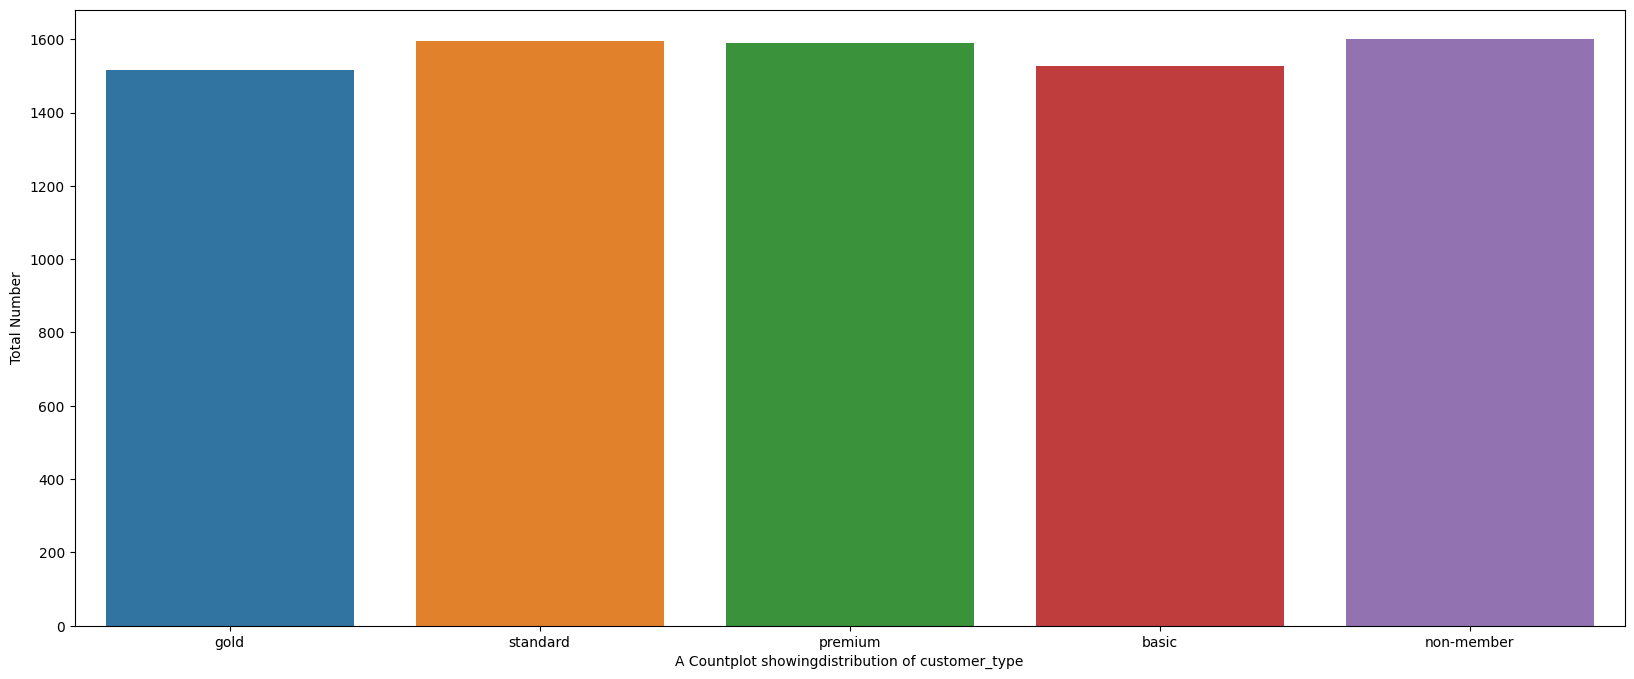

In [24]:
draw_countplot('customer_type') # Lots of standards and premium members

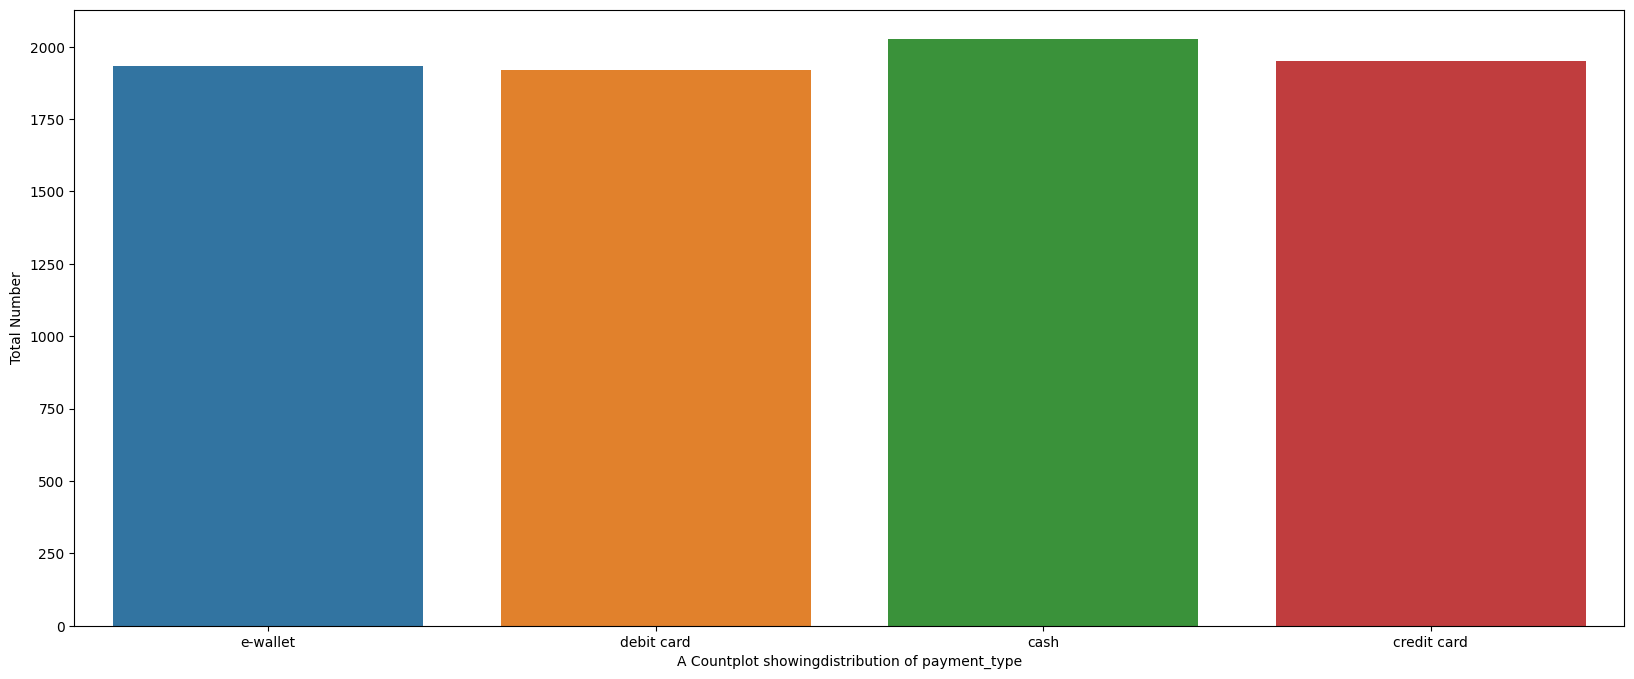

In [25]:
draw_countplot('payment_type') # A majority of the customers paid in cash

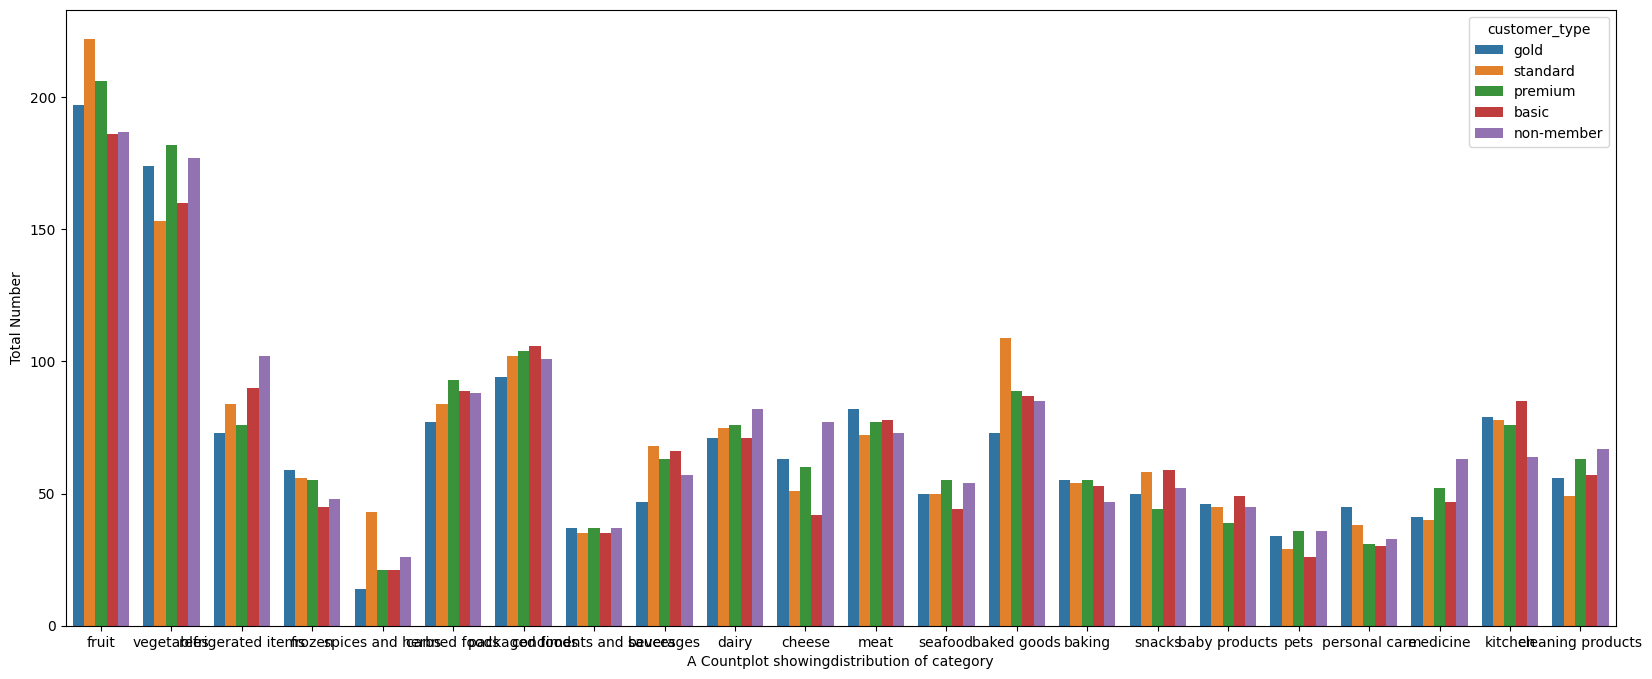

In [26]:
draw_countplot('category',hue='customer_type')  # Premium customers love purchasing fruits  and vegetables

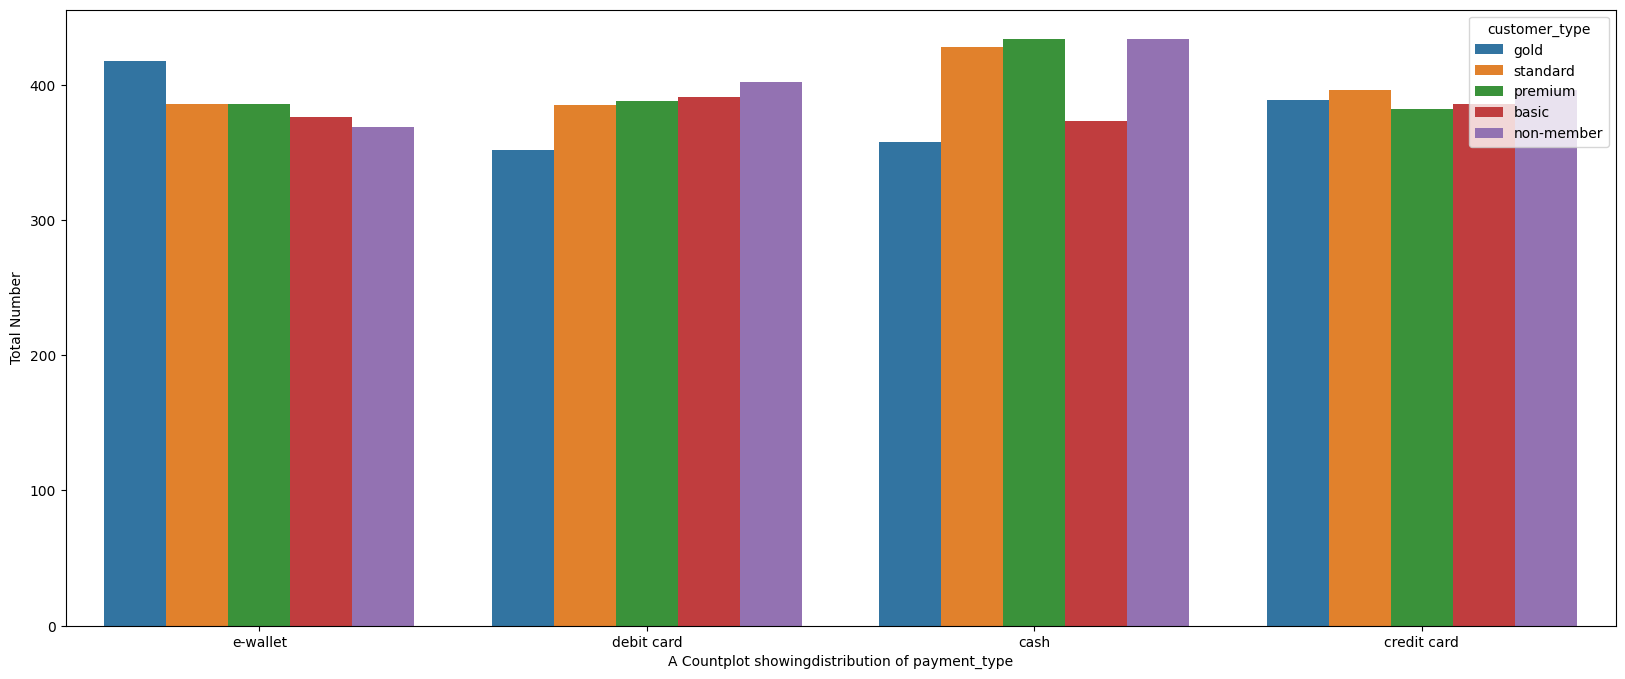

In [27]:
draw_countplot('payment_type',hue='customer_type')

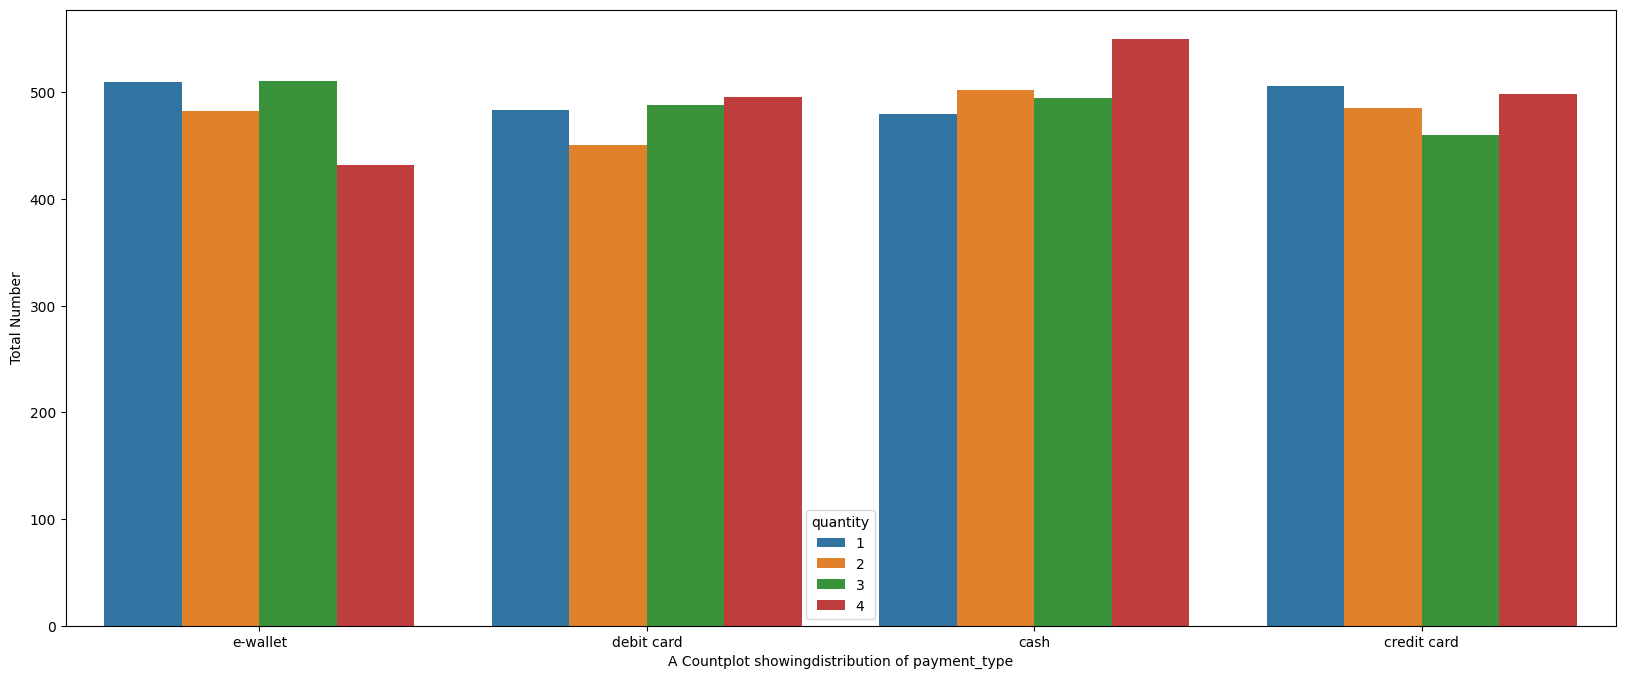

In [28]:
draw_countplot('payment_type',hue='quantity')

# CONCLUSIONS AND RECOMMENDATIONS :
**HOW TO STOCK YOUR GOODS**


It is quite difficult to generate conclusions given the narrow range of data ,however these are some of the points I have picked
Premium customers prefer fruits and vegetables ,stock more of fruits to get maximum value .
Tailor goods to capture more Standard customers
Gold and Standard customers prefer e-wallet and cash purchases more than they will credit and debit cards
Those who paid in cash mostly purchased 4 items .